### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Import Libraries_**</p>

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 1000)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', 100)

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "colab"
#To display the plots
%matplotlib inline
from ipywidgets import interact

<a style="color:Blue" >**Reading data into the program**</a>

In [2]:
df0 = pd.read_csv("EXIST_2018.csv")
df0

,Date,Hour,HOLY,MCP,MCP_24,MCP_168,MCP_672,PISO,PIBO,SSOV,SBOV,MO,MB,TV,DER,TG,NG,HYD,LIG,RYHD,ICOAL,WIND,SOL,FUEL,GEO,ASPH,BCOAL,BIO,IMEX,WAS,GASP,ANK,IST
0,2018-01-01,00:00:00,0,55.040,47.440,38.250,27.810,8197.900,10649.500,29100.300,15069.800,12011.600,12011.700,544371.189,3.777,30379.530,7955.330,5748.650,5166.650,1898.920,6356.820,1482.380,0.000,179.200,781.240,280.410,198.500,246.280,0.000,85.150,186.435,1.800,7.800
1,2018-01-01,01:00:00,0,54.440,41.560,38.250,36.590,9161.100,6188.700,31475.500,15687.000,12662.200,12662.200,515520.340,3.777,28280.820,7465.350,4512.220,5159.900,1845.040,6077.710,1438.050,0.000,183.100,785.670,282.620,198.500,244.890,0.000,87.770,186.435,1.500,8.100
2,2018-01-01,02:00:00,0,43.730,26.180,27.810,36.590,9592.400,6017.900,32891.800,15444.200,12693.800,12693.900,360364.316,3.777,26811.790,6907.140,3909.250,5173.990,1886.980,5701.790,1464.770,0.000,179.400,791.230,273.780,194.500,247.690,0.000,81.270,186.435,1.100,7.600
3,2018-01-01,03:00:00,0,40.970,25.130,35.520,26.710,9375.700,5831.100,33120.300,15043.500,12297.700,12297.800,335572.221,3.777,25900.830,6836.270,3496.040,5222.010,1783.040,5216.620,1575.780,0.000,176.700,791.420,273.780,196.500,248.080,0.000,84.590,186.435,0.500,7.400
4,2018-01-01,04:00:00,0,29.860,25.130,38.250,36.390,9234.300,5693.800,33213.900,14953.700,12208.200,12208.300,333326.464,3.777,25454.700,6728.720,3231.800,5183.250,1724.650,5110.530,1711.830,0.000,182.900,783.440,273.780,193.500,245.110,0.000,85.190,186.435,0.000,7.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43674,2023-01-01,19:00:00,0,224.620,236.140,257.250,257.920,9750.400,19752.600,25083.100,25596.200,21304.800,21304.800,4845274.365,18.703,34711.430,9254.910,5524.660,5446.660,978.900,9269.390,687.700,0.000,65.000,1261.830,75.070,419.280,964.680,688.160,75.190,1032.200,0.000,11.900
43675,2023-01-01,20:00:00,0,224.620,205.870,202.210,241.800,9483.400,19108.900,24367.500,24884.300,20850.000,20849.600,4371176.106,18.703,33235.310,8855.380,4281.830,5379.670,1063.010,9292.520,789.030,0.000,65.300,1268.060,72.860,401.920,981.630,704.390,79.710,1032.200,0.000,12.000
43676,2023-01-01,21:00:00,0,224.620,216.080,241.170,161.200,9577.500,18428.100,24863.600,24161.900,19928.800,19928.800,4249568.776,18.703,31937.540,7538.880,4016.780,5536.550,1038.450,9270.580,908.460,0.000,66.100,1277.350,75.070,382.890,975.860,769.550,81.020,1032.200,-0.300,12.200
43677,2023-01-01,22:00:00,0,184.050,190.970,203.600,204.130,9633.400,16617.700,24073.200,22520.400,18569.400,18569.400,3665598.832,18.703,31004.800,5918.090,4743.610,5408.150,999.920,9272.480,1025.830,0.000,64.400,1286.910,75.070,397.090,973.410,768.780,71.060,1032.200,-1.100,12.100


In [3]:
df = df0.copy()

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_1.Data Cleaning_**</p>

<a style="color:Blue" >**_UTF-8-Code_**</a>

In [4]:
df.sample(20)

,Date,Hour,HOLY,MCP,MCP_24,MCP_168,MCP_672,PISO,PIBO,SSOV,SBOV,MO,MB,TV,DER,TG,NG,HYD,LIG,RYHD,ICOAL,WIND,SOL,FUEL,GEO,ASPH,BCOAL,BIO,IMEX,WAS,GASP,ANK,IST
41527,2022-10-04,08:00:00,1,232.230,251.370,244.960,247.240,8868.000,19468.100,22184.500,25071.500,19886.500,19886.500,4746229.301,18.516,33996.980,9011.220,3150.560,5407.360,1236.580,8627.950,3201.750,756.510,84.900,1159.850,178.840,538.540,832.630,-278.660,88.950,1407.800,19.300,20.300
14417,2019-08-27,10:00:00,1,54.710,54.960,56.940,57.490,9965.600,22686.500,30343.800,26094.800,23193.800,23193.900,1259065.829,5.828,41439.730,8506.120,12024.630,5903.300,1734.130,8475.870,3196.830,68.690,38.900,676.380,340.010,254.690,339.290,-181.810,62.700,258.590,29.000,30.100
18991,2020-03-07,20:00:00,0,55.000,53.940,53.490,55.990,10158.800,19830.200,29775.800,24065.500,20211.100,20211.100,1066065.300,6.103,37612.940,5938.150,10511.390,4137.370,4172.440,8250.230,2391.810,0.000,37.500,1116.900,342.230,268.560,479.750,-93.700,60.310,234.120,8.800,14.500
9001,2019-01-12,15:00:00,0,43.320,47.950,47.970,53.590,13260.200,18415.400,34940.600,22879.300,20459.100,20459.100,968809.940,5.424,39515.440,9798.400,8620.530,4692.600,2938.000,7992.830,3415.050,37.240,187.600,918.790,240.660,353.500,332.190,-60.350,48.400,293.340,3.500,3.900
32212,2021-09-10,14:00:00,1,59.480,61.460,77.220,73.740,14165.800,27724.200,29398.000,33153.900,27992.300,27992.300,1762029.058,8.472,41316.950,16681.150,3861.390,5696.480,1082.400,7440.200,3723.760,669.280,39.800,972.300,337.810,475.920,701.620,-466.270,101.110,256.890,26.700,22.400
5658,2018-08-26,02:00:00,0,48.720,38.370,55.090,39.830,7271.100,12324.300,30857.100,20471.500,12782.000,12781.900,537909.968,6.094,27260.340,5094.500,5548.090,5310.240,847.660,7520.150,1139.560,0.000,159.600,781.320,344.430,190.500,262.210,-28.000,90.080,215.334,21.700,22.900
24038,2020-10-04,15:00:00,1,38.490,40.540,38.740,39.810,11702.700,24260.300,29475.000,29902.500,25058.100,25058.100,1008724.026,7.751,33913.110,10169.240,7667.970,4781.600,880.780,7003.680,594.470,150.030,38.700,930.850,337.810,596.720,468.600,201.000,91.660,168.450,24.800,26.900
10876,2019-03-31,21:00:00,0,53.640,54.790,54.590,60.770,11805.300,14495.500,31212.100,18895.500,17423.700,17423.700,945223.874,5.572,34958.720,4606.280,9568.030,4731.300,3619.230,5348.690,5299.040,0.000,141.700,966.390,328.980,306.500,387.220,-414.870,70.230,269.770,5.100,7.300
24985,2020-11-13,06:00:00,1,38.560,30.290,28.620,36.750,11891.500,21314.700,34935.600,24429.500,21762.500,21762.500,712206.786,7.783,30046.230,10448.870,1009.240,5012.020,910.630,7592.530,2885.580,4.590,33.200,1222.650,335.600,585.060,516.380,-588.200,78.080,185.120,3.400,13.100
31174,2021-07-29,07:00:00,1,44.150,43.050,41.610,48.820,13532.400,23395.500,27499.700,27960.800,24322.400,24322.400,1176592.047,8.556,36682.490,15038.120,2413.980,5194.910,1131.430,5898.870,4494.170,314.900,40.600,1064.190,337.820,459.040,628.660,-449.320,115.120,243.800,25.800,27.100


<a style="color:Blue" >**_Variables in the data_**</a>

In [5]:
df.columns

Index(['Date', 'Hour', 'HOLY', 'MCP', 'MCP_24', 'MCP_168', 'MCP_672', 'PISO',
       'PIBO', 'SSOV', 'SBOV', 'MO', 'MB', 'TV', 'DER', 'TG', 'NG', 'HYD',
       'LIG', 'RYHD', 'ICOAL', 'WIND', 'SOL', 'FUEL', 'GEO', 'ASPH', 'BCOAL',
       'BIO', 'IMEX', 'WAS', 'GASP', 'ANK', 'IST'],
      dtype='object')

<a style="color:Blue" >**_Data Shape_**</a>

In [6]:
df.shape

(43679, 33)

<font color = 'red'><br>
**General Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43679 entries, 0 to 43678
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     43679 non-null  object 
 1   Hour     43679 non-null  object 
 2   HOLY     43679 non-null  int64  
 3   MCP      43679 non-null  float64
 4   MCP_24   43679 non-null  float64
 5   MCP_168  43679 non-null  float64
 6   MCP_672  43679 non-null  float64
 7   PISO     43679 non-null  float64
 8   PIBO     43679 non-null  float64
 9   SSOV     43679 non-null  float64
 10  SBOV     43679 non-null  float64
 11  MO       43679 non-null  float64
 12  MB       43679 non-null  float64
 13  TV       43679 non-null  float64
 14  DER      43679 non-null  float64
 15  TG       43679 non-null  float64
 16  NG       43679 non-null  float64
 17  HYD      43679 non-null  float64
 18  LIG      43679 non-null  float64
 19  RYHD     43679 non-null  float64
 20  ICOAL    43679 non-null  float64
 21  WIND     436

<a style="color:Blue" >**_Duplicated value_**</a>

In [8]:
df.duplicated().value_counts()

False    43679
dtype: int64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Null values in data_**</p>

In [9]:
df.isnull().sum()

Date       0
Hour       0
HOLY       0
MCP        0
MCP_24     0
MCP_168    0
MCP_672    0
PISO       0
PIBO       0
SSOV       0
SBOV       0
MO         0
MB         0
TV         0
DER        0
TG         0
NG         0
HYD        0
LIG        0
RYHD       0
ICOAL      0
WIND       0
SOL        0
FUEL       0
GEO        0
ASPH       0
BCOAL      0
BIO        0
IMEX       0
WAS        0
GASP       0
ANK        0
IST        0
dtype: int64

In [10]:
df.isnull().sum() / df.shape[0] * 100

Date      0.000
Hour      0.000
HOLY      0.000
MCP       0.000
MCP_24    0.000
MCP_168   0.000
MCP_672   0.000
PISO      0.000
PIBO      0.000
SSOV      0.000
SBOV      0.000
MO        0.000
MB        0.000
TV        0.000
DER       0.000
TG        0.000
NG        0.000
HYD       0.000
LIG       0.000
RYHD      0.000
ICOAL     0.000
WIND      0.000
SOL       0.000
FUEL      0.000
GEO       0.000
ASPH      0.000
BCOAL     0.000
BIO       0.000
IMEX      0.000
WAS       0.000
GASP      0.000
ANK       0.000
IST       0.000
dtype: float64

In [11]:
# Veri Sütunu'nun tüm satırları NaN mı

df.isna().all(axis=0).value_counts()

False    33
dtype: int64

<a style="color:Blue" >**_Data types that are objects_<br>_Editing data types_**</a>

In [12]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['Date', 'Hour'], dtype='object')

In [13]:

'''pd.to_datetime(df["Hour"])
df.Hour = pd.to_datetime(df.Hour)'''

'pd.to_datetime(df["Hour"])\ndf.Hour = pd.to_datetime(df.Hour)'

<font color = 'red'><br>
**_Descriptive Statistics_**<br>   

* Compute the min, max, Q1, Q3, and interquartile range<br>
* Compute the variance and standard deviation<br>
* Compute the skewness and kurtosis

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HOLY,43679.000,0.690,0.462,0.000,0.000,1.000,1.000,1.000
MCP,43679.000,67.449,49.874,0.000,41.580,51.700,66.630,264.170
MCP_24,43679.000,67.380,49.814,0.000,41.570,51.650,66.305,264.170
MCP_168,43679.000,66.797,49.076,0.000,41.510,51.490,65.230,264.170
MCP_672,43679.000,65.014,46.667,0.000,41.320,50.950,62.085,264.170
PISO,43679.000,11334.934,2856.462,3721.100,9353.200,11243.900,13157.250,23000.600
PIBO,43679.000,18811.540,4594.161,3721.300,15449.150,18940.500,22215.500,43135.400
SSOV,43679.000,29642.208,4767.823,10444.200,26618.150,30047.000,32992.550,44737.700
SBOV,43679.000,24578.563,4623.185,10715.200,21129.500,24655.400,27948.300,47542.800
MO,43679.000,19744.961,3776.736,9640.100,16808.700,19825.800,22537.400,32222.500


<font color = 'red'><br>
**Correlation**

'\nf,ax=plt.subplots(figsize = (18,18))\n# corr() is actually pearson correlation\nsns.heatmap(df.corr(),annot= True,linewidths=0.2,fmt = ".2f",ax=ax)\nplt.xticks(rotation=90)\nplt.yticks(rotation=0)\nplt.title(\'Correlation Map\')\nplt.show()\n\n# Resmi kaydetmek için savefig kullanımı\nplt.savefig(\'correlation_map.png\')\n'

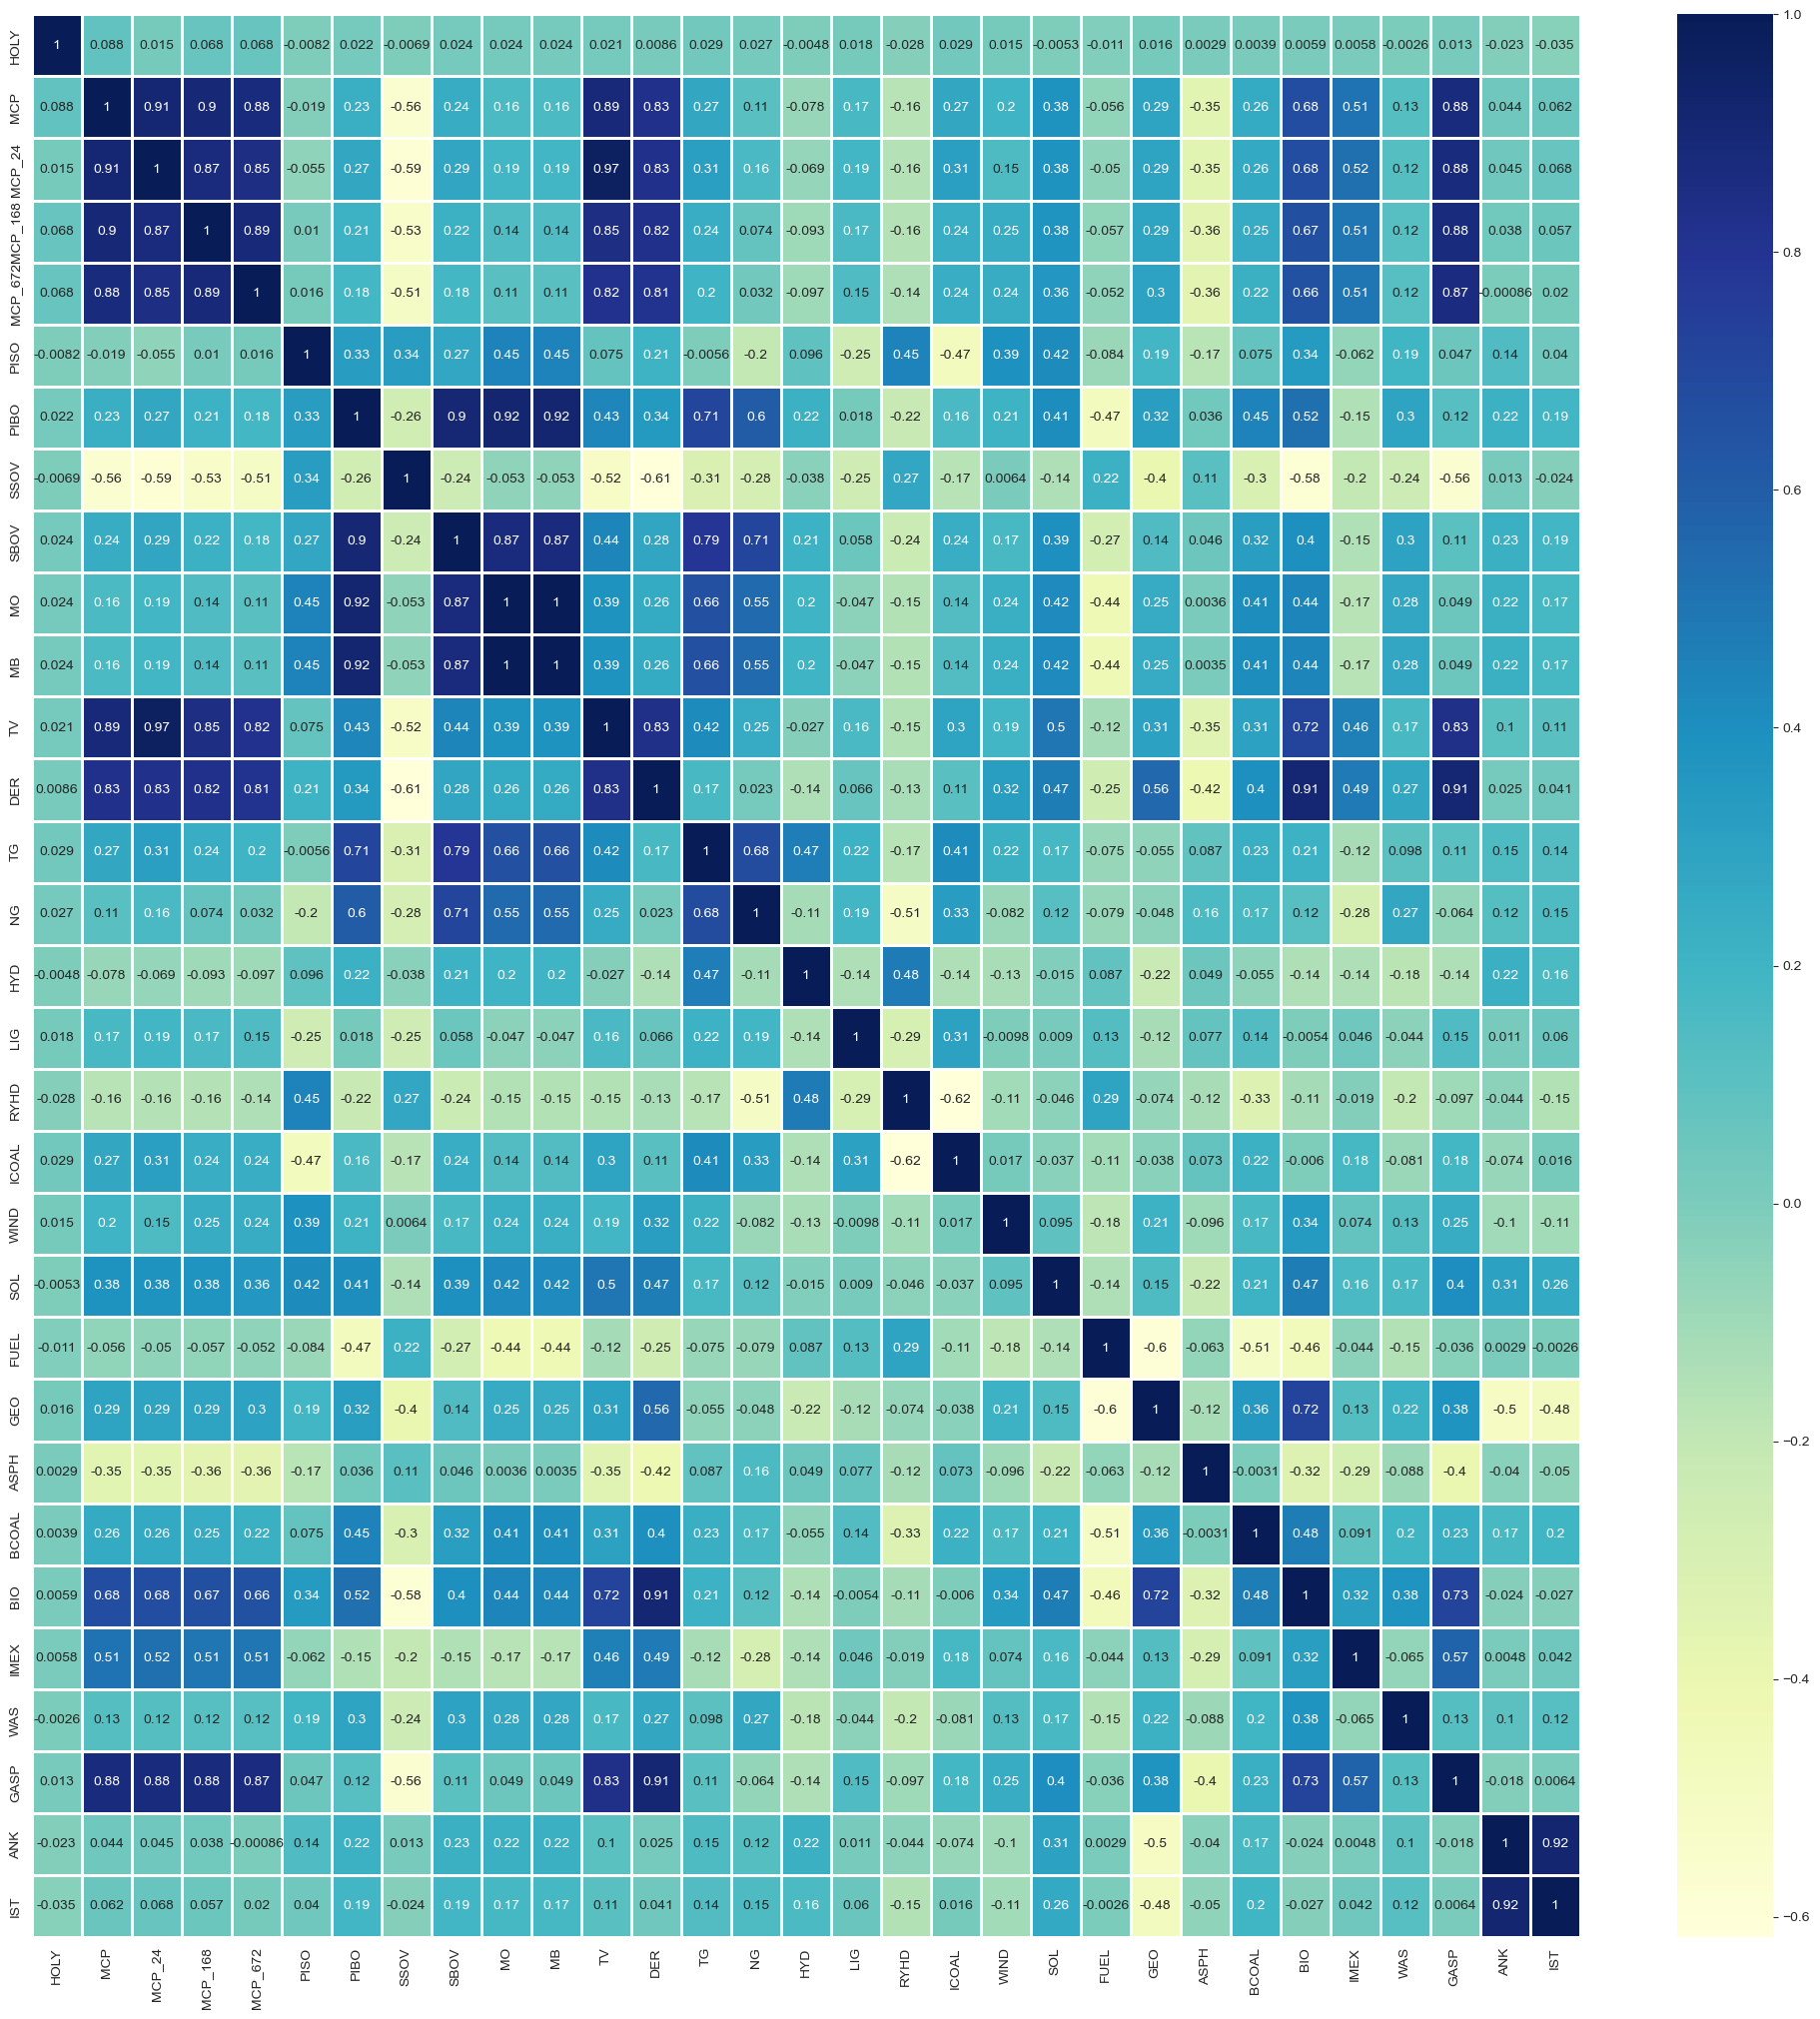

In [15]:
plt.figure(figsize=(25,25))
fig_cor = sns.heatmap(df.corr(), annot=True,linewidths=0.8, cmap="YlGnBu")

'''
f,ax=plt.subplots(figsize = (18,18))
# corr() is actually pearson correlation
sns.heatmap(df.corr(),annot= True,linewidths=0.2,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

# Resmi kaydetmek için savefig kullanımı
plt.savefig('correlation_map.png')
'''

In [16]:
df_corr = df.corr()[["MCP"]].drop("MCP").sort_values(by = "MCP", ascending = False)
df_corr

,MCP
MCP_24,0.910
MCP_168,0.899
TV,0.887
GASP,0.876
MCP_672,0.875
DER,0.827
BIO,0.677
IMEX,0.509
SOL,0.381
GEO,0.294


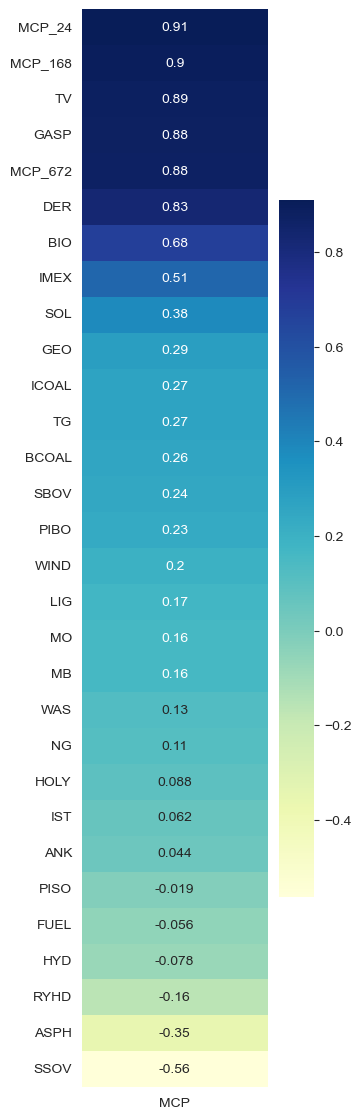

In [17]:
plt.figure(figsize = (3, 14))
sns.heatmap(df_corr, annot = True, cmap = "YlGnBu")

'''
plt.savefig("heatmap.png")  # Isı haritasını kaydet
'''
plt.show()

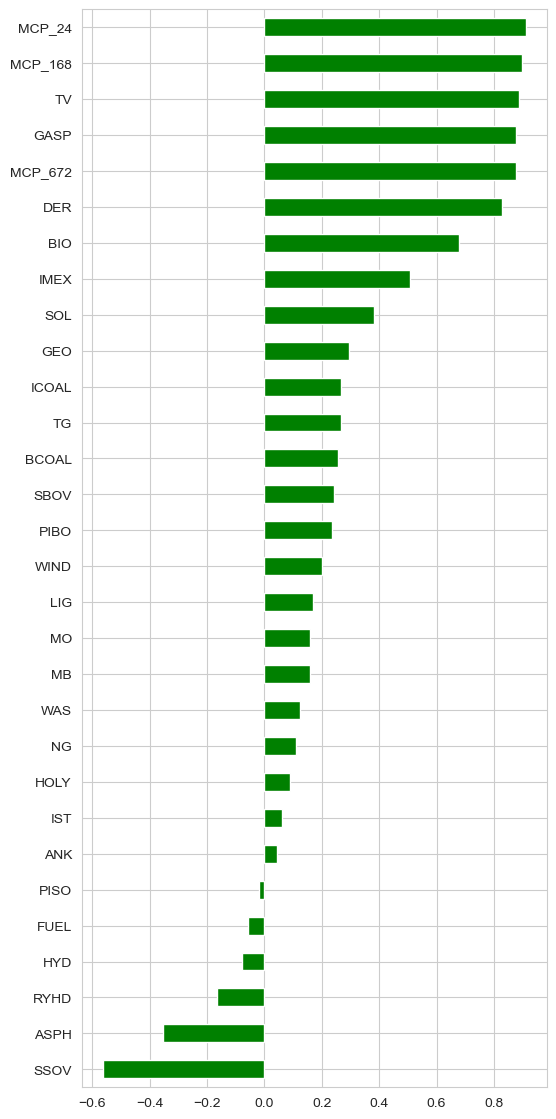

In [18]:
plt.figure(figsize = (6, 14))
df.corr()["MCP"].drop("MCP").sort_values().plot.barh(color='green');

'''
# Grafiği kaydedin
plt.savefig("correlation_barh_plot.png")
'''

plt.show()

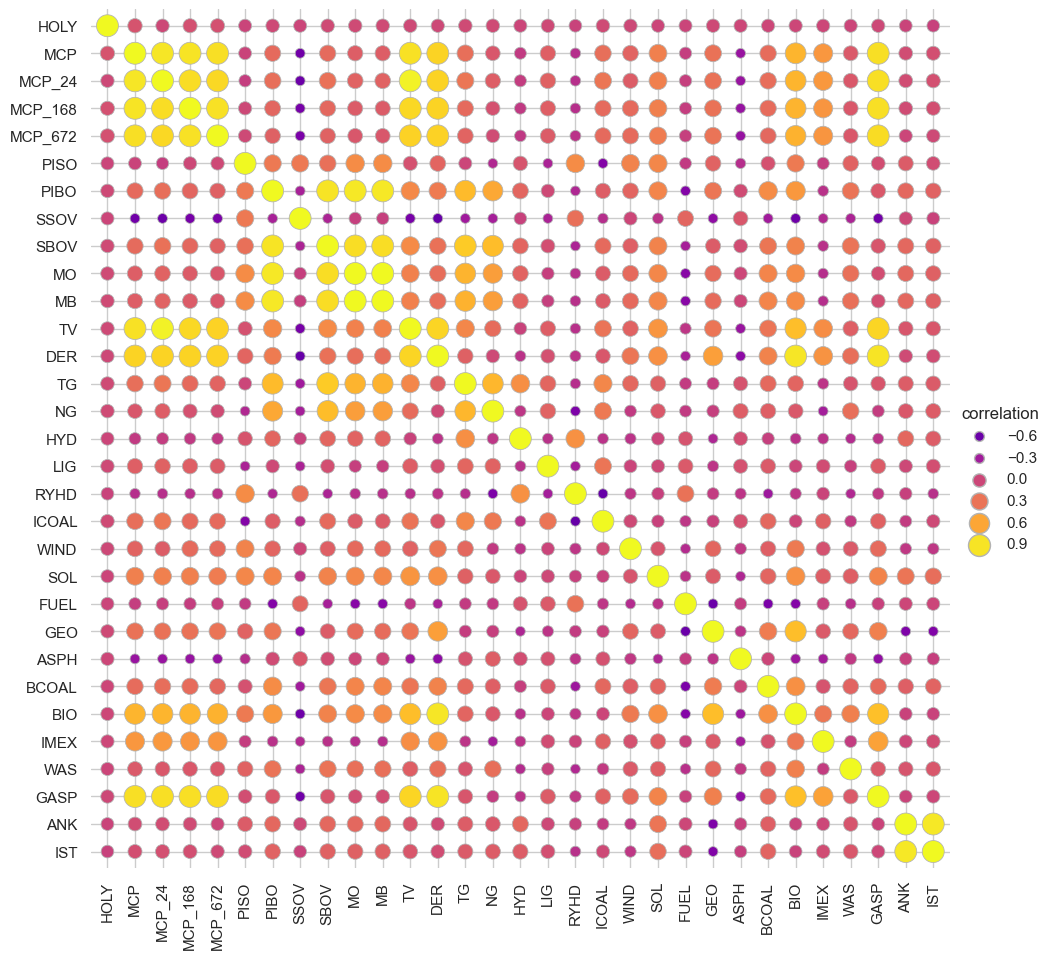

In [19]:
sns.set_theme(style="whitegrid")

corr_mat = df.corr().stack().reset_index(name="correlation")

#corr_mat = df.stack().reset_index(name="correlation")
corr_mat["abs_correlation"] = abs(corr_mat["correlation"])




# Compute a correlation matrix and convert to long-form

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="plasma", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
    
    
    
    
'''Oluşturulan görseli kaydetmek için bu adımı ekleyin

g.savefig('correlation_plot.png')

Görseli kaydettikten sonra temizleyebilirsiniz
plt.close()
'''

plt.show()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_2.Handling with Missing Values_**</p>

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%; text-align:left; border-radius:10px 10px;">**_User Defined Functions (DEFs) to fill the missing values_**</p>

In [20]:
# User Defined Function for first-looking to the features/columns
# Özelliklere/sütunlara ilk bakış için Kullanıcı Tanımlı Fonksiyon

def first_looking(col):
    print("COLUMN NAME    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

In [21]:
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")


miss_val

Columns that have missing values :


[]

In [22]:
df_notnull = df[df.columns[~df.isnull().any()]]
df_notnull.columns

Index(['Date', 'Hour', 'HOLY', 'MCP', 'MCP_24', 'MCP_168', 'MCP_672', 'PISO',
       'PIBO', 'SSOV', 'SBOV', 'MO', 'MB', 'TV', 'DER', 'TG', 'NG', 'HYD',
       'LIG', 'RYHD', 'ICOAL', 'WIND', 'SOL', 'FUEL', 'GEO', 'ASPH', 'BCOAL',
       'BIO', 'IMEX', 'WAS', 'GASP', 'ANK', 'IST'],
      dtype='object')

In [23]:
for col in df_notnull.columns:
    print(first_looking(col))
    print()

COLUMN NAME    :  Date
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1826
--------------------------------
2018-01-01    24
2021-04-13    24
2021-05-09    24
2021-05-08    24
2021-05-07    24
              ..
2019-04-09    14
2021-12-12    13
2019-09-06    12
2018-05-17    11
2019-09-05     8
Name: Date, Length: 1826, dtype: int64
None

COLUMN NAME    :  Hour
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  24
--------------------------------
12:00:00    1824
14:00:00    1823
13:00:00    1823
20:00:00    1822
18:00:00    1822
15:00:00    1822
21:00:00    1821
19:00:00    1821
07:00:00    1821
17:00:00    1821
10:00:00    1821
16:00:00    1821
22:00:00    1820
06:00:00    1820
00:00:00    1819
09:00:00    1818
08:00:00    1818
04:00:00    1818
02:00:00    1818
23:00:00    1818
01:00:00    1817
11:00:00    1817
05:00:00    1817
03:00:00    1817
Name: Hour, dtype: int64
None

COLUMN NAME    :  H

In [24]:
drop_list = ["Date","Hour"]
df.drop(columns = drop_list, inplace=True)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Univariate & Multivariate Analysis_**</p>

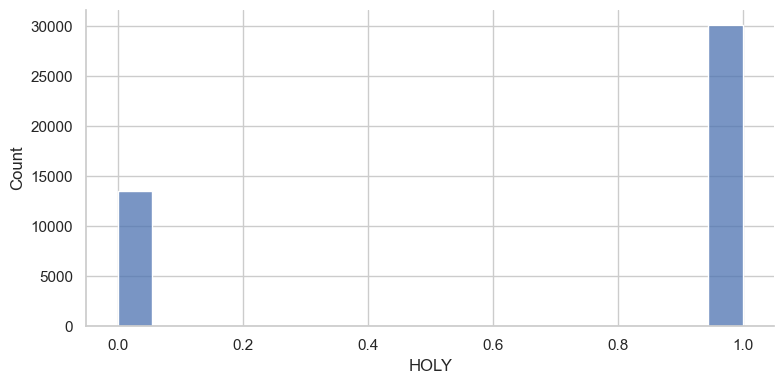

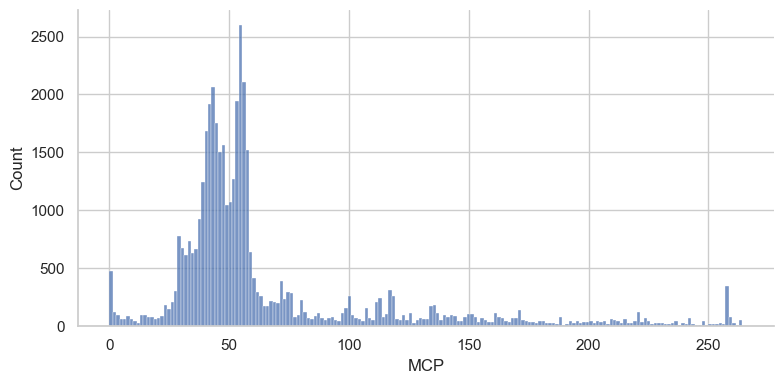

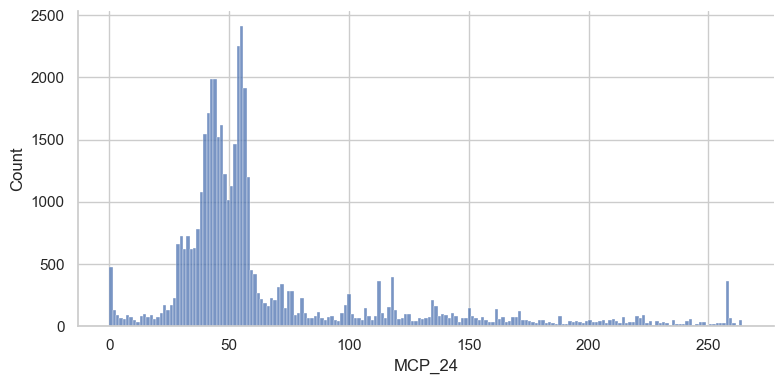

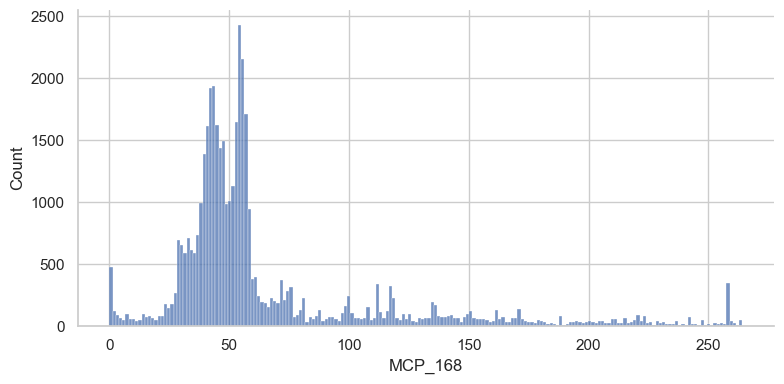

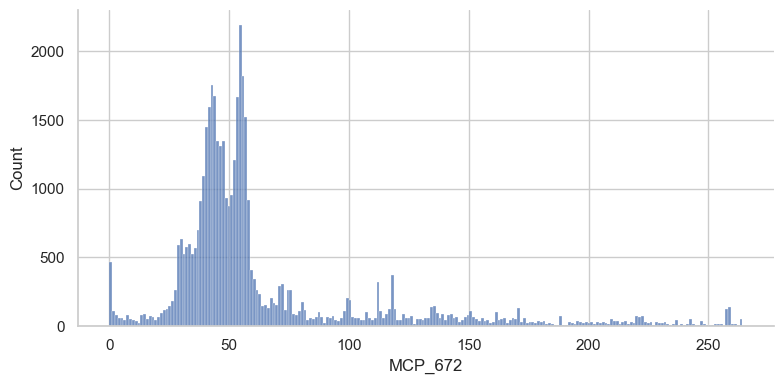

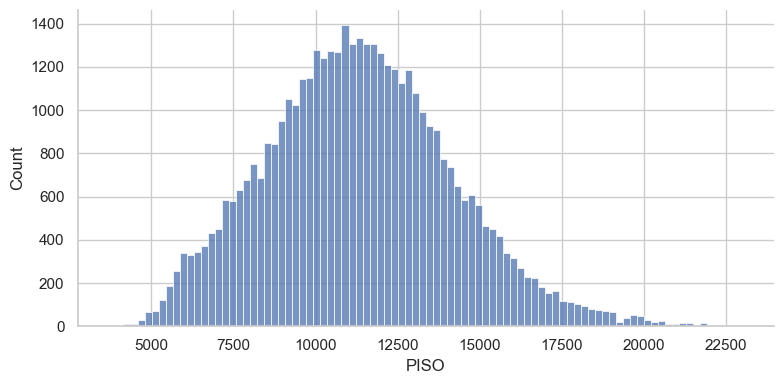

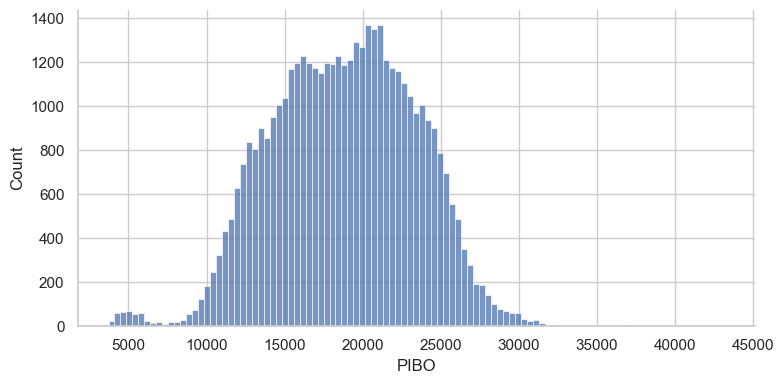

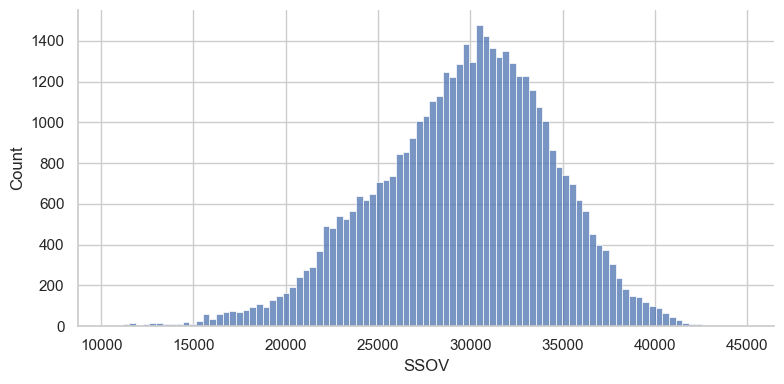

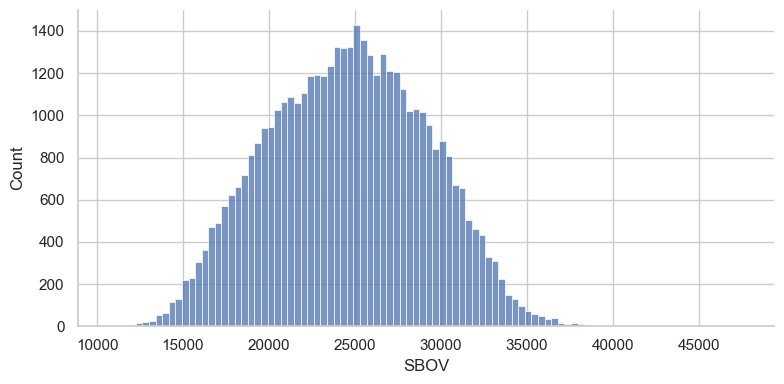

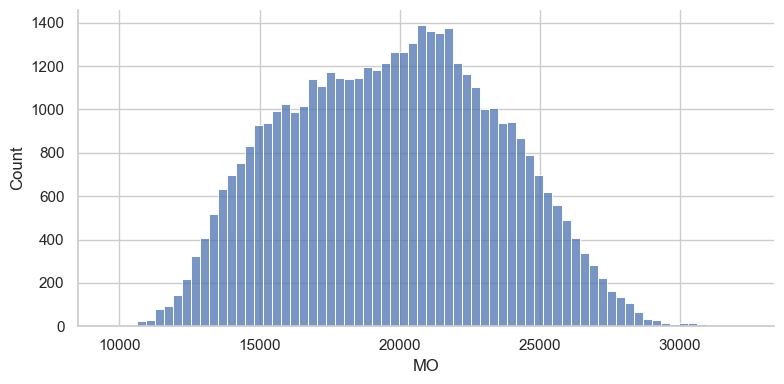

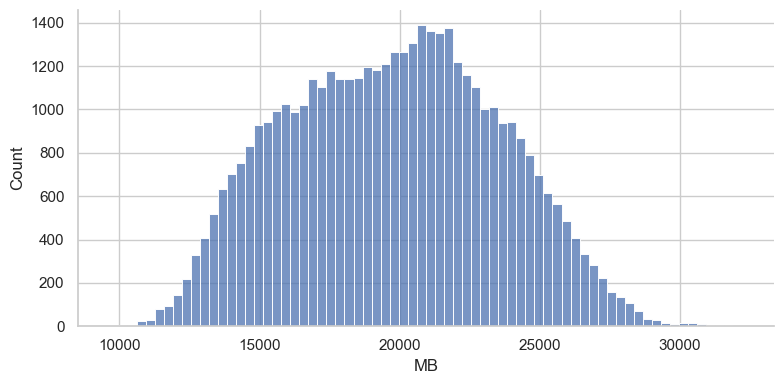

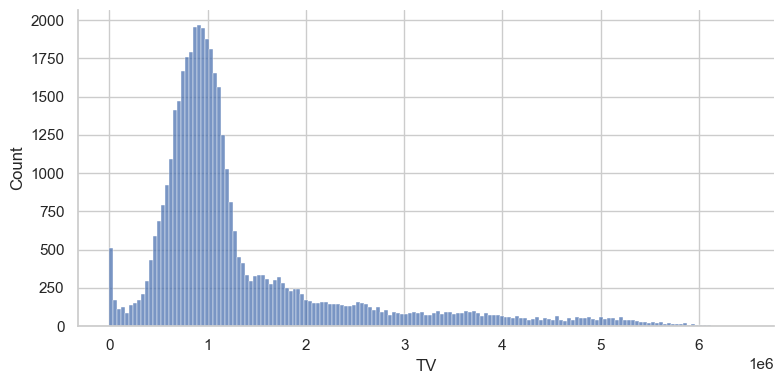

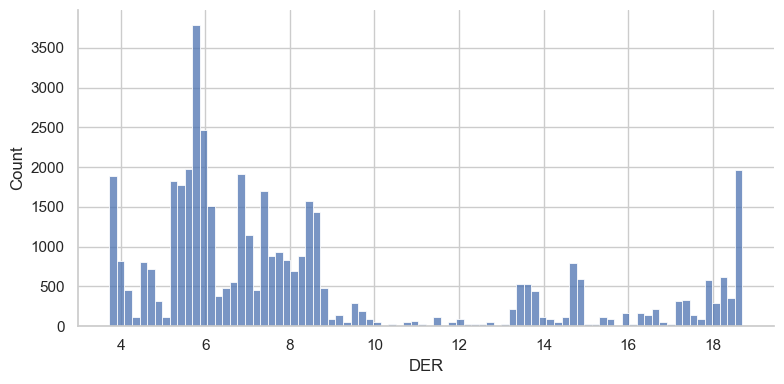

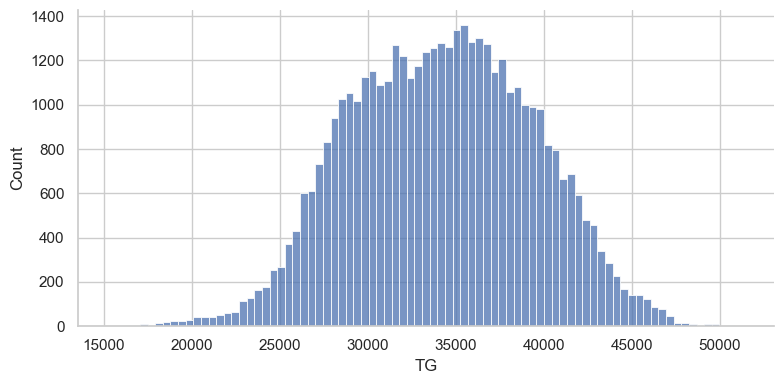

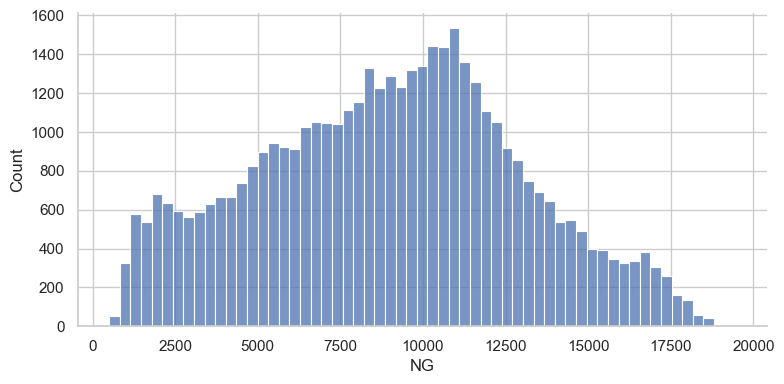

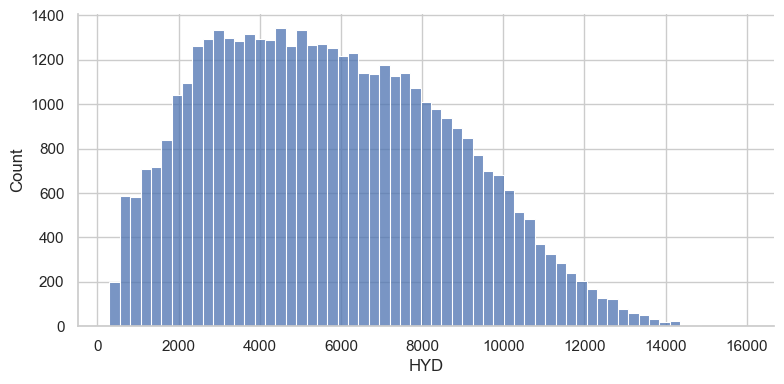

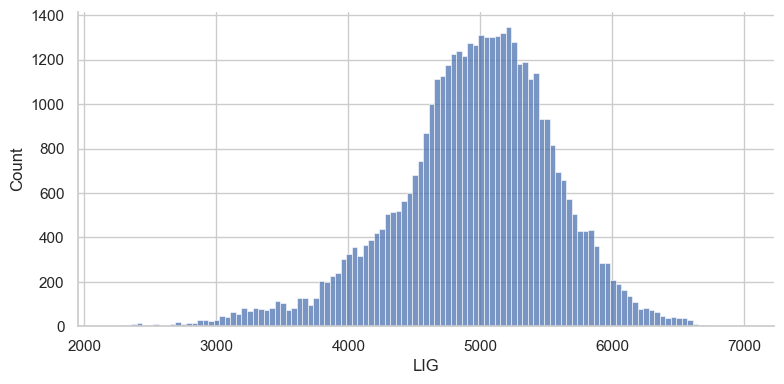

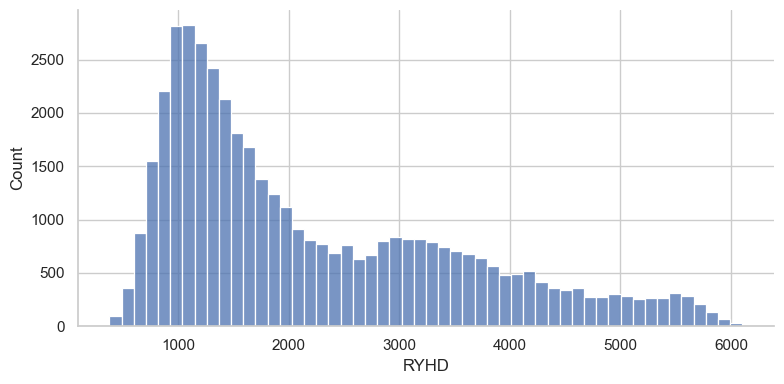

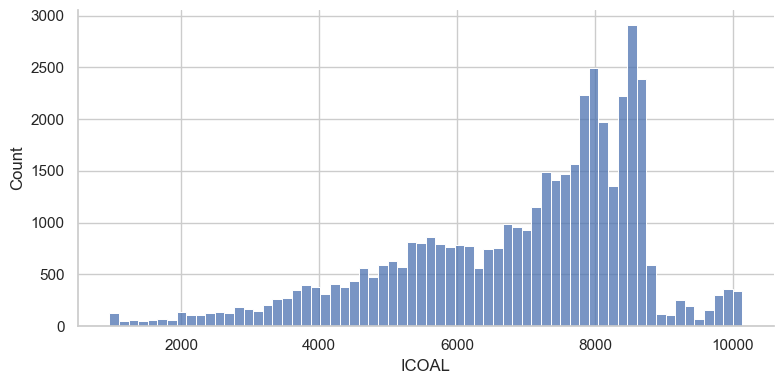

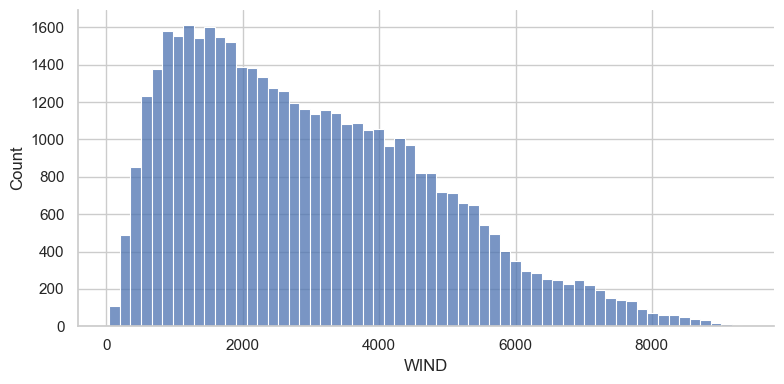

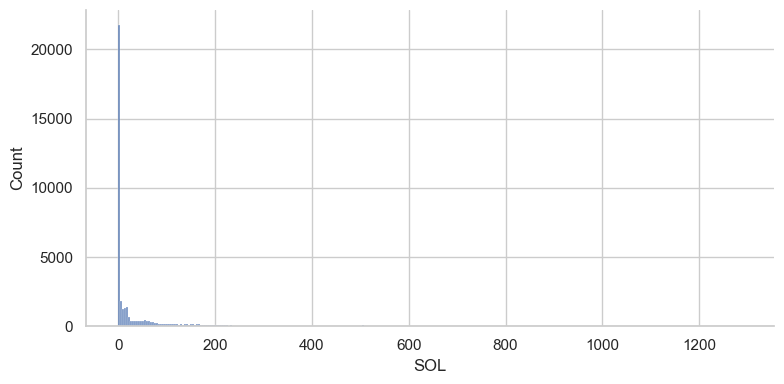

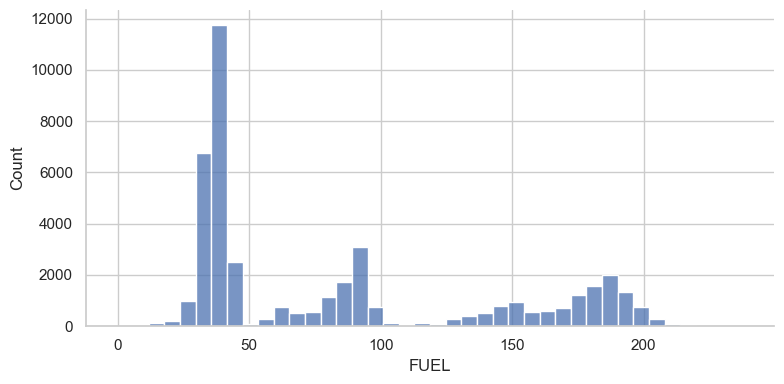

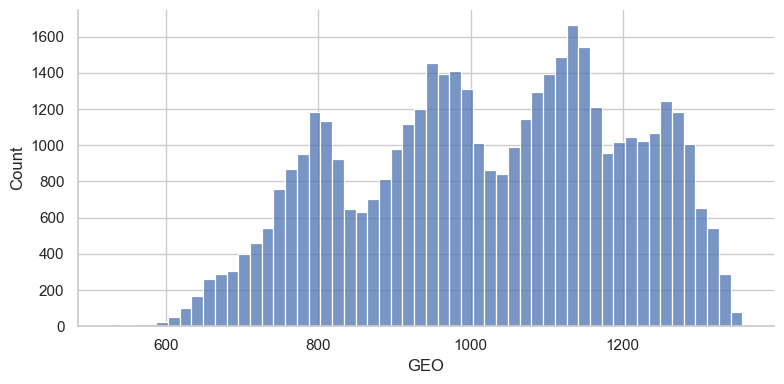

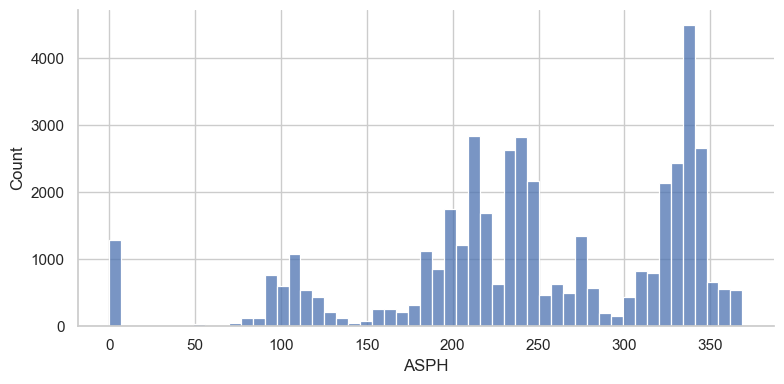

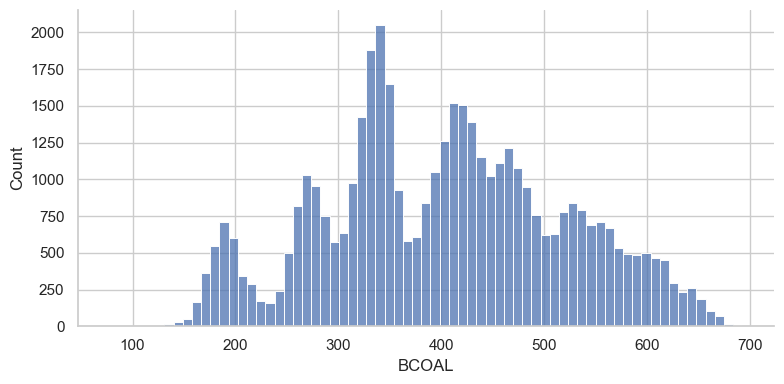

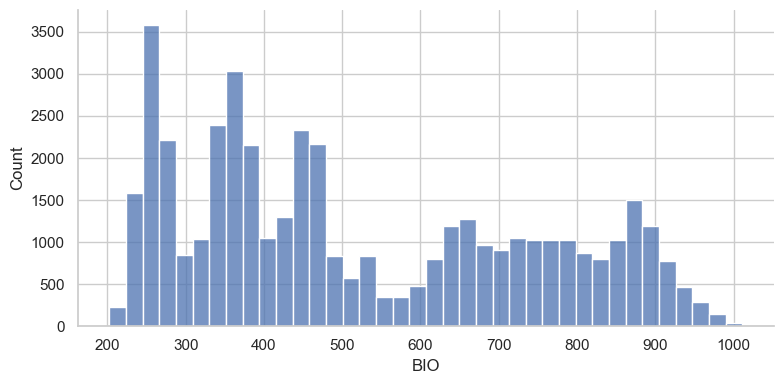

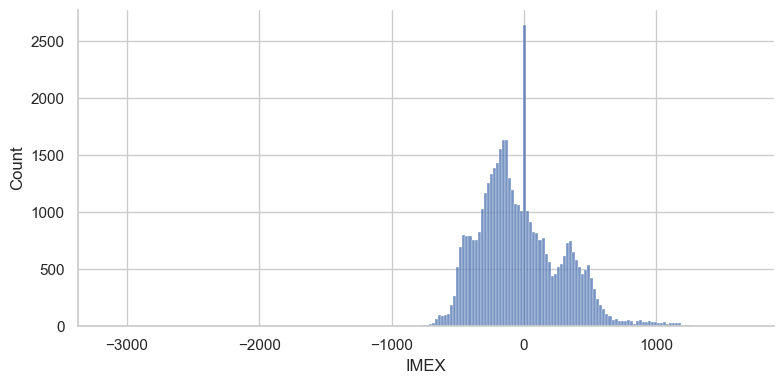

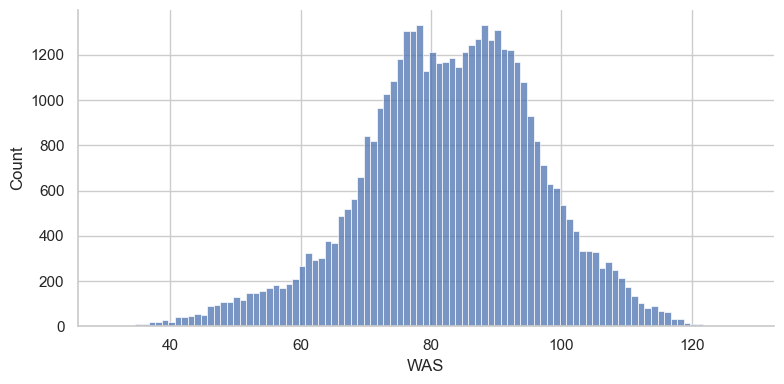

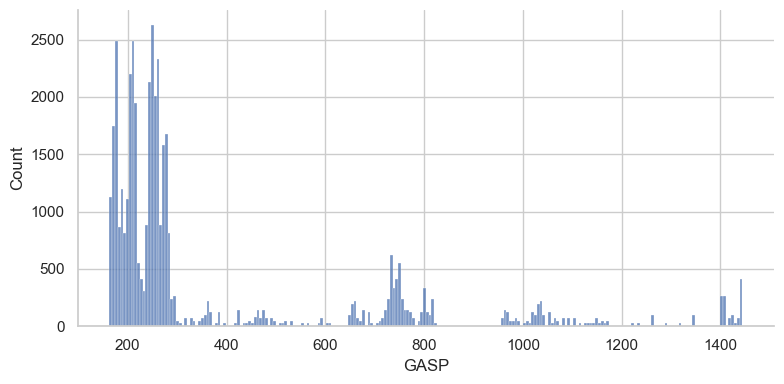

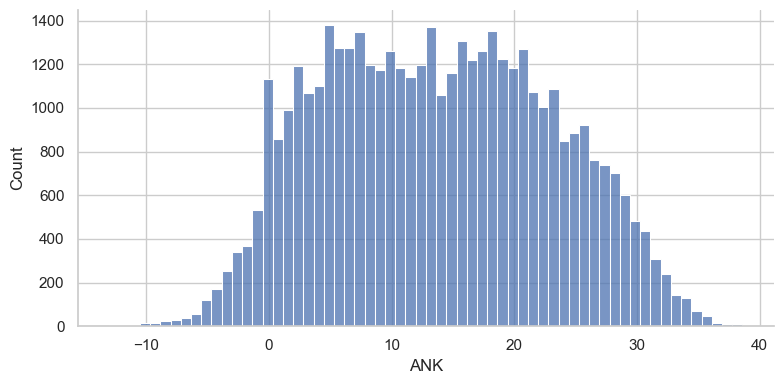

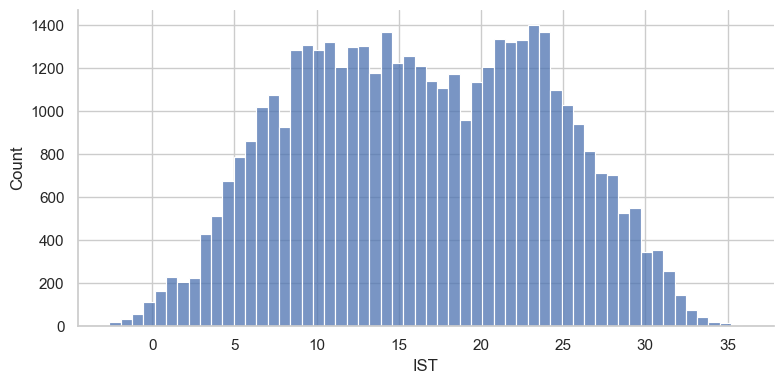

In [25]:
for col in df.columns:
    sns.displot(x=col, height = 4, aspect = 2, data=df)

<Axes: >

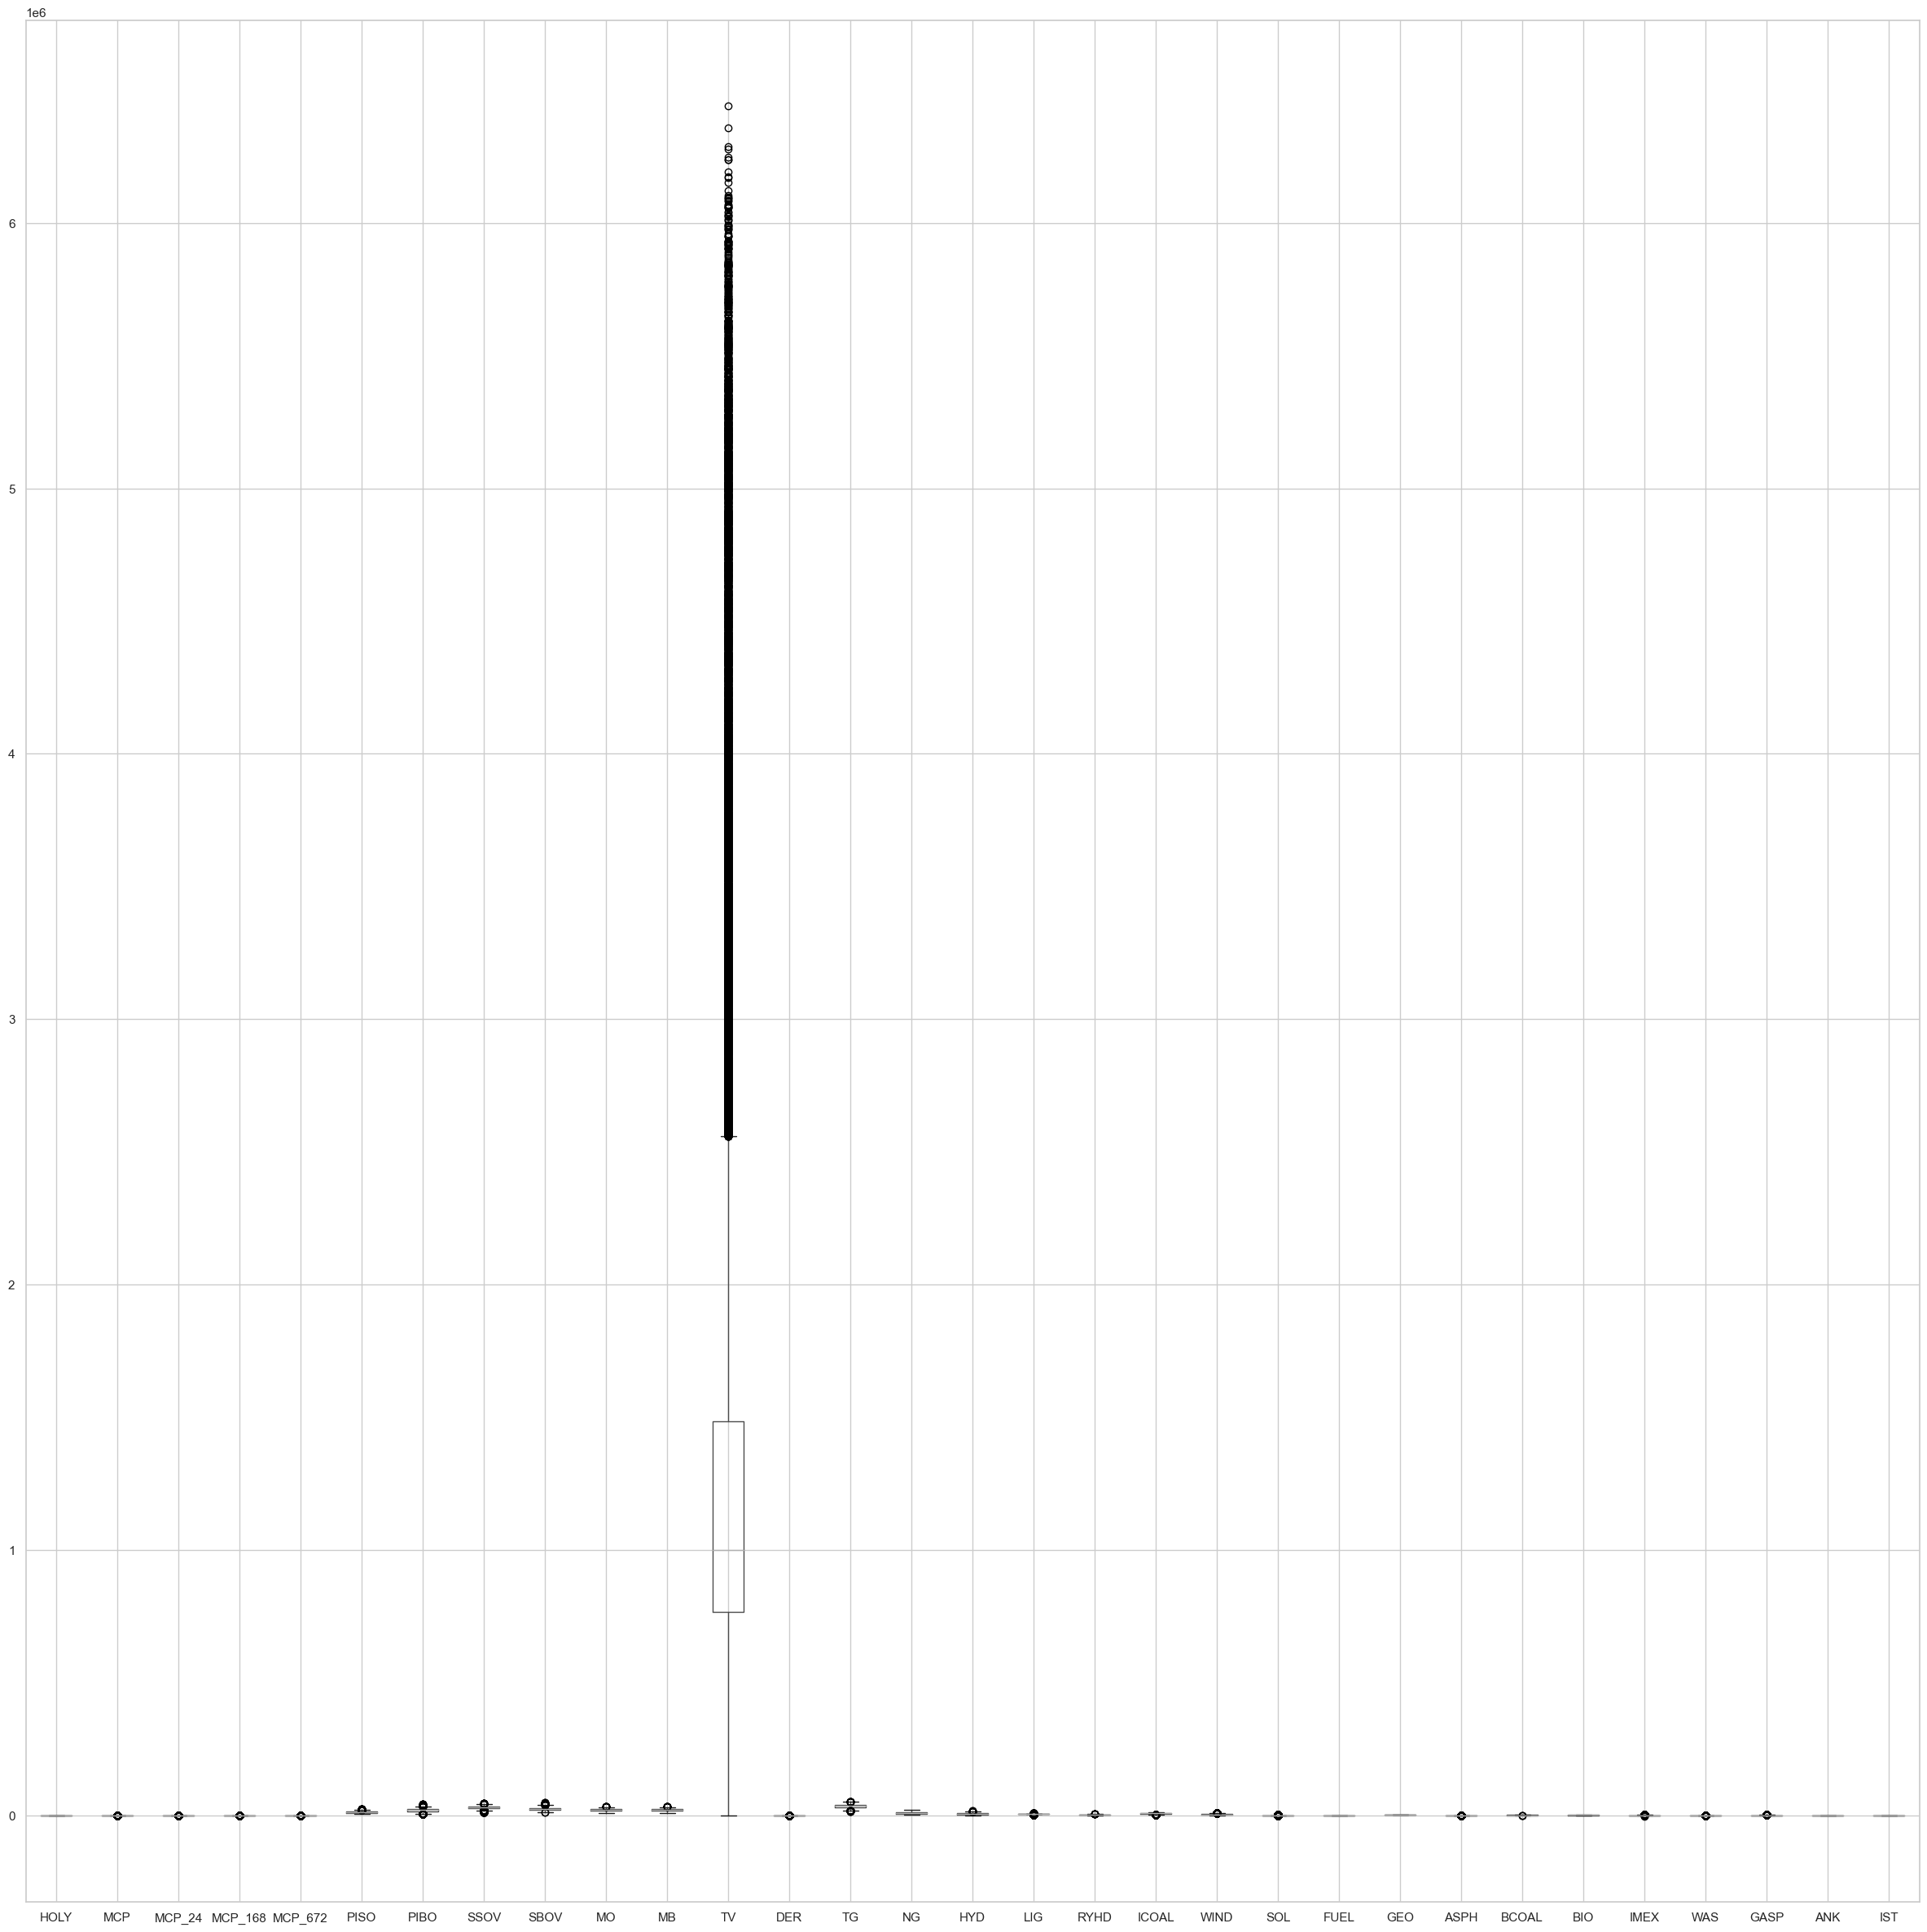

In [26]:
plt.figure(figsize =(30,30))
df.boxplot()

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_MCP_USD (Target Feature)_**</p>

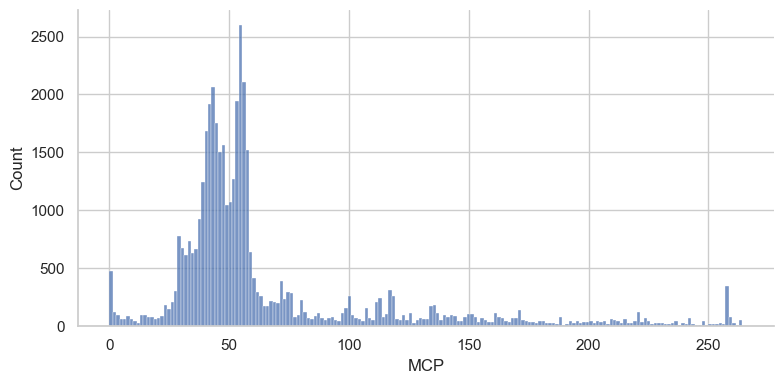

In [27]:
sns.displot(x="MCP", height = 4, aspect = 2, data=df);

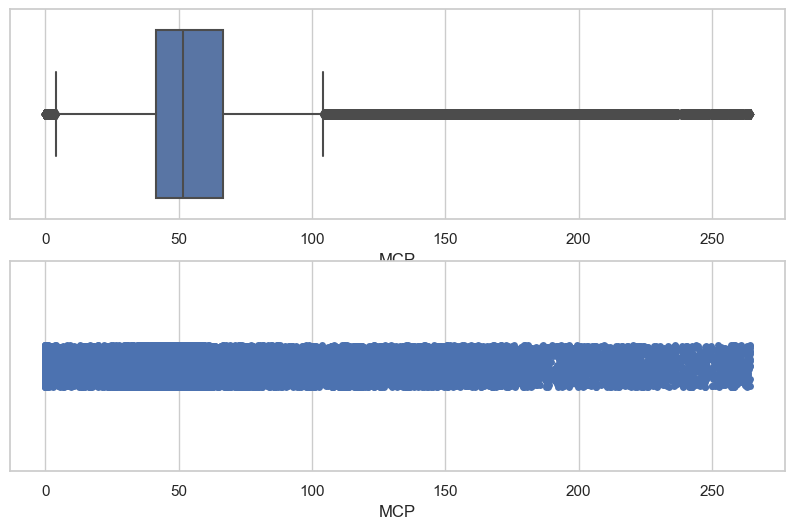

In [28]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(x=df.MCP, orient='h')

plt.subplot(212)
sns.stripplot(x=df.MCP, orient='h');